# **Tracking Customer Sentiment Trends Using Deep Learning**

# **Business Understanding**   
Customer sentiment plays a crucial role in shaping business strategies and decision-making. As businesses introduce new product lines, adjust pricing, or improve services, customer opinions evolve. Tracking sentiment over time provides valuable insights into how these changes impact customer satisfaction. By analyzing customer feedback, businesses can identify trends, enhance product offerings, and address potential issues before they escalate.  

The ability to monitor and analyze customer sentiment is essential for businesses aiming to improve customer experience and maintain a competitive edge. Positive sentiment indicates customer satisfaction, while negative sentiment can highlight areas that require immediate attention. Understanding sentiment trends helps businesses refine their products, optimize marketing strategies, and improve service delivery.  

# **Problem Statement** 
Customer sentiment is dynamic and influenced by multiple factors, including product quality, delivery efficiency, and pricing strategies. However, businesses often lack a structured approach to track sentiment changes over time. Without a robust sentiment analysis model, companies risk making uninformed decisions that could negatively impact customer retention and brand reputation. This project aims to develop a deep learning-based sentiment classification model that can accurately track customer sentiment trends and provide actionable insights.  

# **Objectives**  
The primary objectives of this project are:  

- Develop a sentiment classification model using deep learning techniques, specifically leveraging TensorFlow Hub and a Deep Neural Network (DNN) classifier.  
- Analyze sentiment trends over time to understand how business decisions affect customer satisfaction.  
- Identify key factors influencing sentiment, such as product quality, pricing, and delivery performance.  
- Provide actionable insights that can help businesses improve customer experience and optimize their operations.  

# **Metrics of Success**  
The success of this project will be evaluated using a combination of model performance metrics and business insights.  

## **Model Performance Metrics**  
- **F1-Score (≥ 78%)** – This will serve as the primary metric, as it balances precision and recall, ensuring that both positive and negative sentiments are correctly classified.  
- **Recall (≥ 75%)** – Since capturing negative sentiment is critical for business decision-making, recall will be prioritized to ensure that dissatisfied customers are correctly identified.  
- **Accuracy (≥ 85%)** – While overall correctness is important, accuracy alone may not be sufficient due to potential class imbalances.  

## **Business Insights Metrics**  
- **Sentiment Trend Analysis (Monthly/Quarterly Shifts)** – The model should successfully detect sentiment shifts over time, allowing businesses to correlate customer feedback with operational changes.  
- **Product and Service Impact Assessment** – The model should identify products or services that generate the most positive or negative sentiment, providing insights for business improvement.  
- **Delivery and Logistics Influence** – By analyzing sentiment variations in relation to delivery performance, the project will help businesses understand how logistics affect customer satisfaction.  


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import zipfile
import os
import math


In [2]:
zip_path = "data/olist_classified_public_dataset.csv.zip"
extract_path = "data"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Data extracted successfully!")

Data extracted successfully!


In [3]:
data_path = os.path.join(extract_path, "olist_classified_public_dataset.csv") 
data = pd.read_csv(data_path)
print(data.head())


   Unnamed: 0  id order_status  order_products_value  order_freight_value  \
0           0   1    delivered                 89.99                14.38   
1           1   2    delivered                 69.00                15.23   
2           2   3    delivered                 99.80                15.86   
3           3   4    delivered                 87.00                12.74   
4           4   5    delivered                 99.90                17.95   

   order_items_qty  order_sellers_qty    order_purchase_timestamp  \
0                1                  1  2017-08-30 11:41:01.000000   
1                1                  1  2017-09-26 09:13:36.000000   
2                2                  4  2018-01-15 15:50:42.000000   
3                1                  1  2018-02-04 11:16:42.000000   
4                1                  2  2017-12-07 11:58:42.000000   

             order_aproved_at order_estimated_delivery_date  ...  \
0  2017-08-30 11:55:08.970352    2017-09-21 00:00:00.0

In [4]:

print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset contains 3584 rows and 34 columns.


In [5]:
print("Columns in dataset:", data.columns)

Columns in dataset: Index(['Unnamed: 0', 'id', 'order_status', 'order_products_value',
       'order_freight_value', 'order_items_qty', 'order_sellers_qty',
       'order_purchase_timestamp', 'order_aproved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'customer_city', 'customer_state', 'customer_zip_code_prefix',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'votes_before_estimate', 'votes_delayed', 'votes_low_quality',
       'votes_return', 'votes_not_as_anounced', 'votes_partial_delivery',
       'votes_other_delivery', 'votes_other_order', 'votes_satisfied',
       'most_voted_subclass', 'most_voted_class'],
      dtype='object')


In [6]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]  
print(missing_values)


order_delivered_customer_date     117
review_comment_title             3584
most_voted_subclass               171
most_voted_class                  171
dtype: int64


In [7]:
data["most_voted_class"] = data["most_voted_class"].astype(str).fillna("Unknown")
data["most_voted_subclass"] = data["most_voted_subclass"].astype(str).fillna("Unknown")
data["review_comment_title"] = data["review_comment_title"].astype(str).fillna("Unknown")


In [8]:
data.dropna(subset=["order_delivered_customer_date"], inplace=True)


In [10]:
print(data.nunique()) 

Unnamed: 0                       3467
id                               3467
order_status                        1
order_products_value             1061
order_freight_value              1565
order_items_qty                     7
order_sellers_qty                  10
order_purchase_timestamp         3064
order_aproved_at                 3090
order_estimated_delivery_date     257
order_delivered_customer_date    3090
customer_city                     879
customer_state                     26
customer_zip_code_prefix          677
product_category_name              60
product_name_lenght                55
product_description_lenght       1218
product_photos_qty                 14
review_score                        5
review_comment_title                1
review_comment_message           2710
review_creation_date              317
review_answer_timestamp          3004
votes_before_estimate               4
votes_delayed                       7
votes_low_quality                   4
votes_return

In [11]:
data.drop(columns=["id", "order_status", "review_comment_title", "Unnamed: 0", "customer_zip_code_prefix"], inplace=True)


In [12]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]  

if missing_values.empty:
    print("No missing values in the dataset!")
else:
    print(missing_values)



No missing values in the dataset!


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3467 entries, 0 to 3583
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_products_value           3467 non-null   float64
 1   order_freight_value            3467 non-null   float64
 2   order_items_qty                3467 non-null   int64  
 3   order_sellers_qty              3467 non-null   int64  
 4   order_purchase_timestamp       3467 non-null   object 
 5   order_aproved_at               3467 non-null   object 
 6   order_estimated_delivery_date  3467 non-null   object 
 7   order_delivered_customer_date  3467 non-null   object 
 8   customer_city                  3467 non-null   object 
 9   customer_state                 3467 non-null   object 
 10  product_category_name          3467 non-null   object 
 11  product_name_lenght            3467 non-null   int64  
 12  product_description_lenght     3467 non-null   int64 

In [14]:
data.describe()

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,product_name_lenght,product_description_lenght,product_photos_qty,review_score,votes_before_estimate,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied
count,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000
mean,131.154041,22.429086,1.101817,1.479954,49.139025,737.344678,2.162100,3.592155,0.415633,0.331410,0.138160,0.126622,0.149697,0.365734,0.113354,0.043554,1.339775
std,201.551859,20.758190,0.451662,1.339118,9.875377,631.721787,1.699504,1.629335,0.930051,0.880351,0.541637,0.496210,0.582320,1.011510,0.456552,0.266641,1.422528
min,4.520000,0.000000,1.000000,1.000000,9.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,13.610000,1.000000,1.000000,43.000000,324.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,79.990000,16.750000,1.000000,1.000000,52.000000,570.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,145.575000,24.060000,1.000000,1.000000,57.000000,945.500000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4850.000000,401.580000,8.000000,12.000000,64.000000,3948.000000,20.000000,5.000000,3.000000,6.000000,3.000000,4.000000,6.000000,6.000000,3.000000,4.000000,6.000000


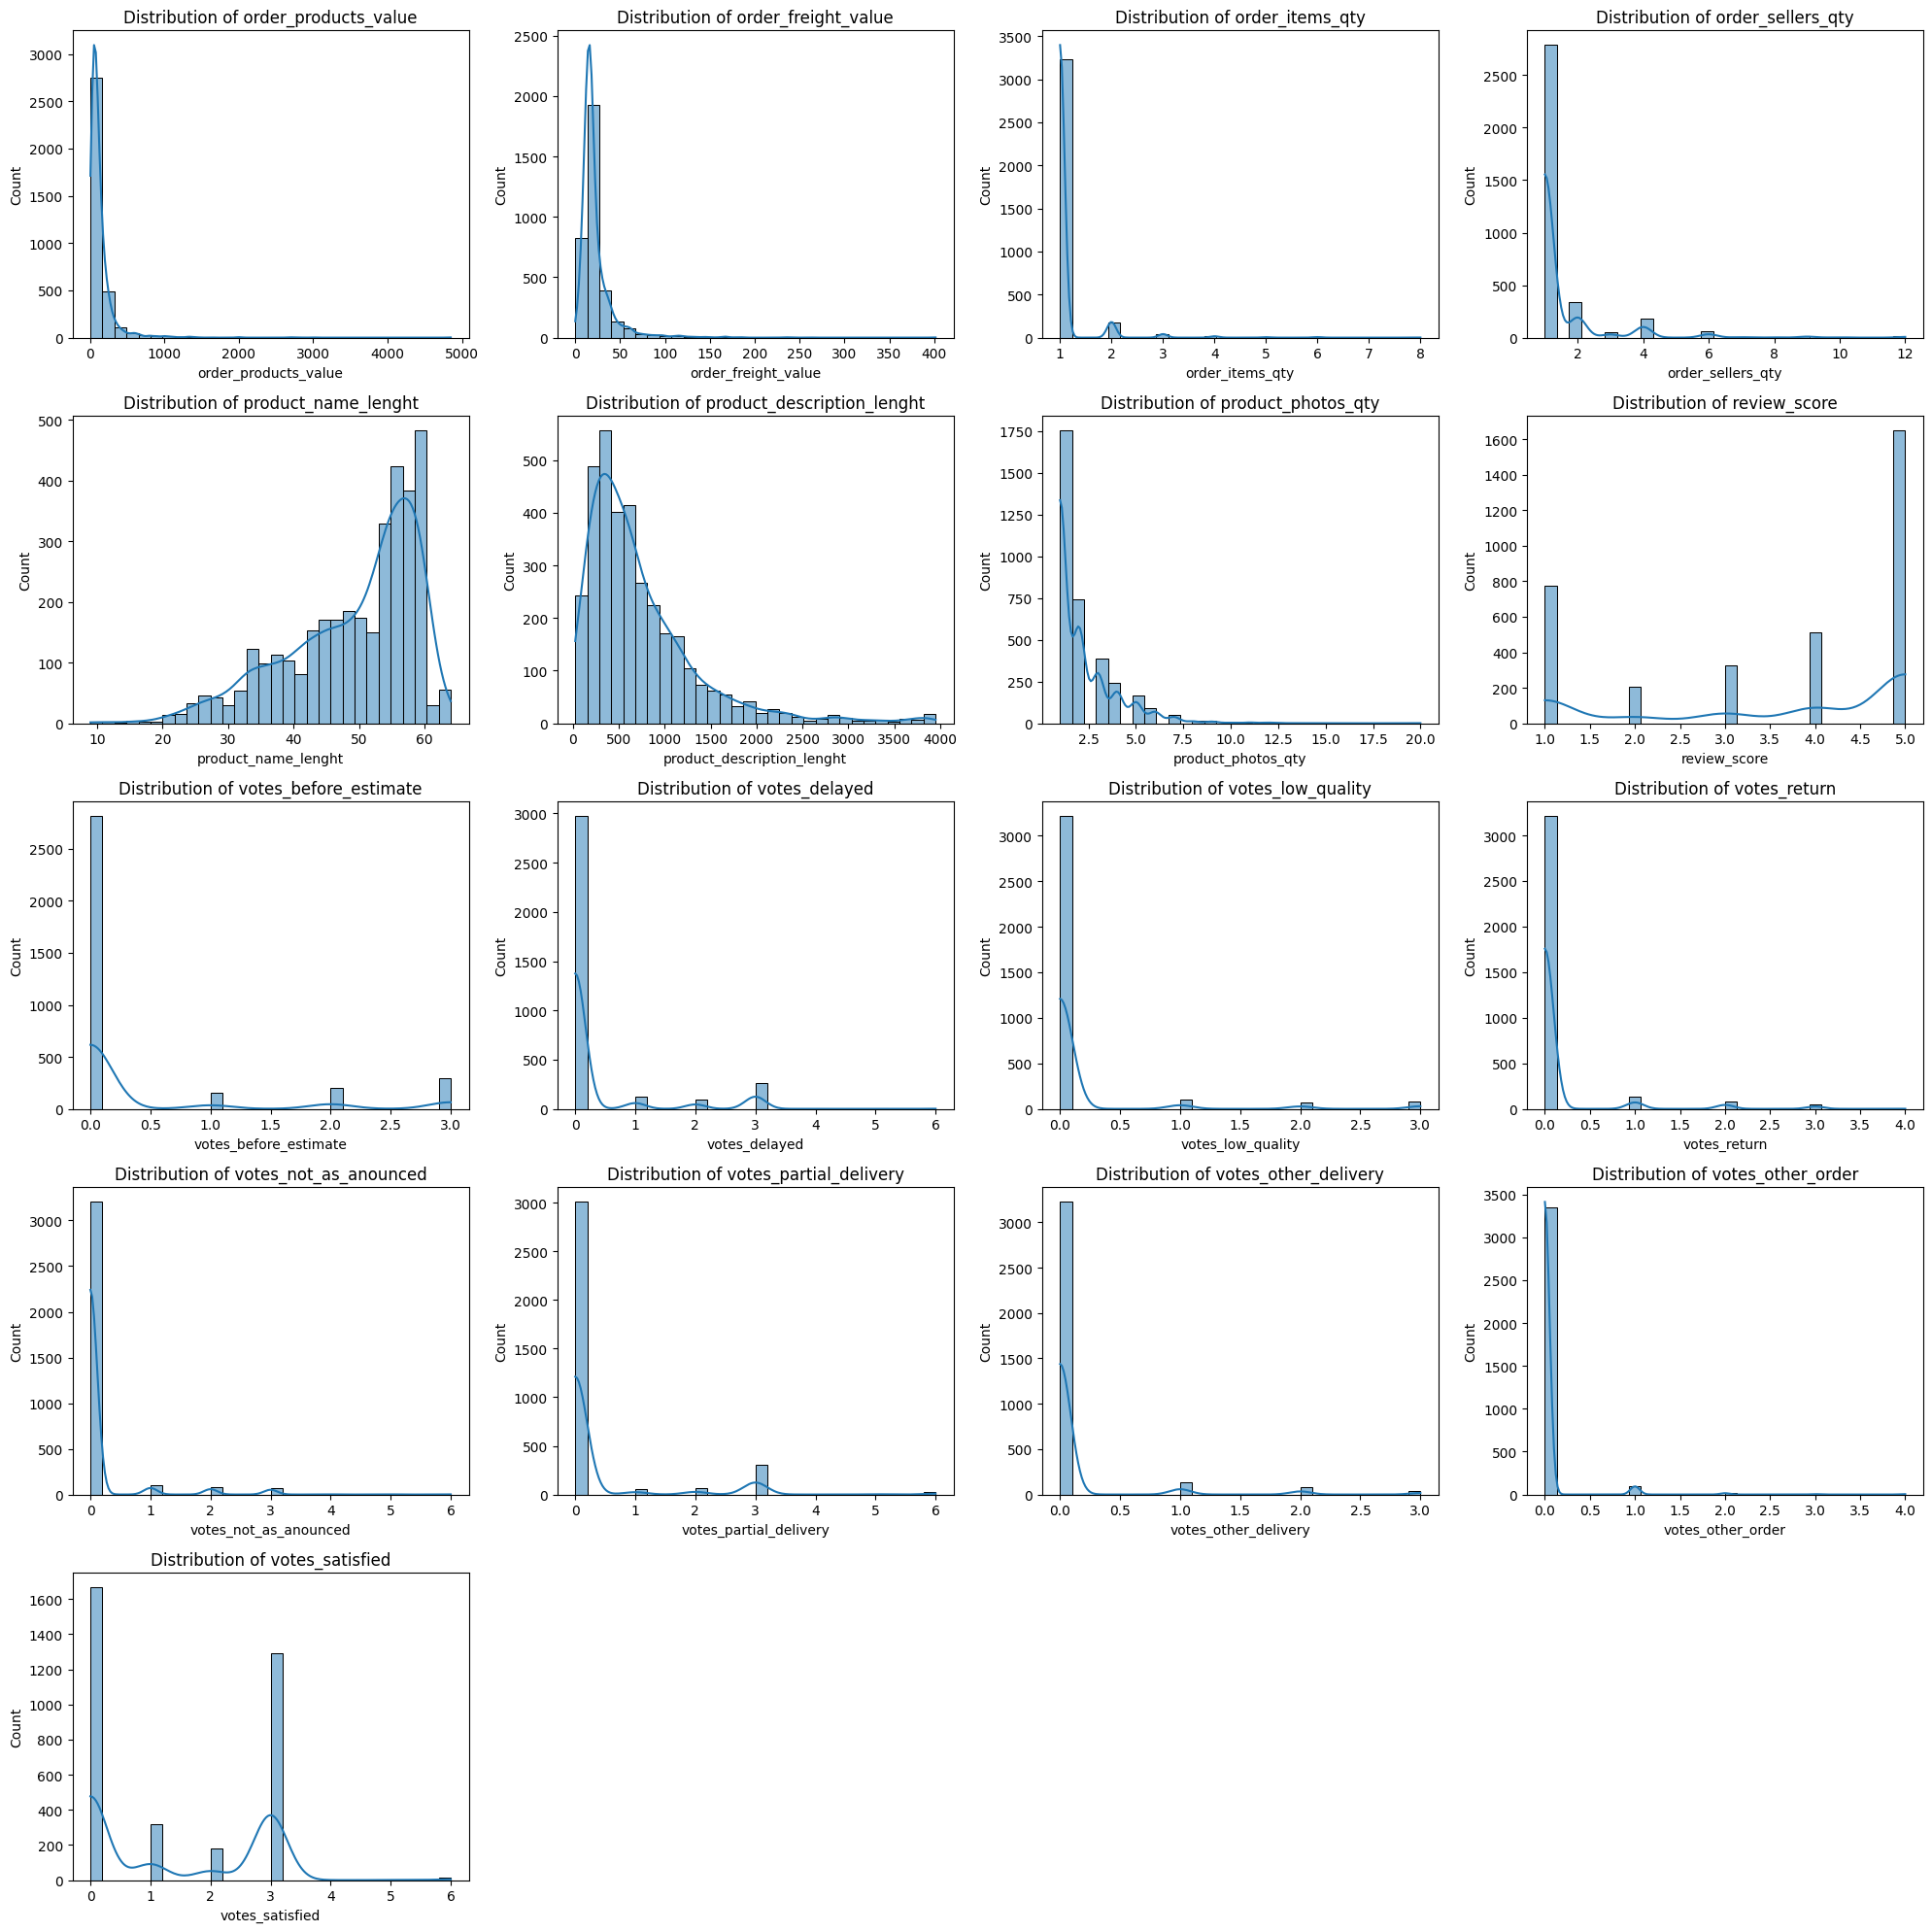

In [18]:
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns
num_features = len(numerical_cols)
rows = math.ceil(num_features / 4) 
cols = min(4, num_features) 
plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

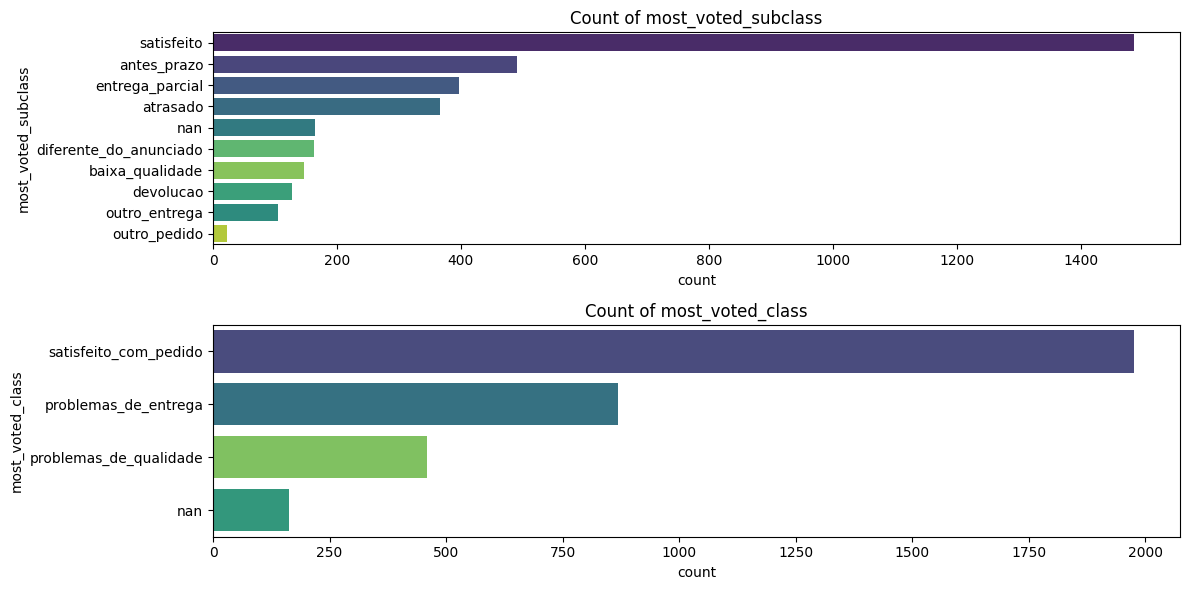

In [21]:

categorical_cols = data.select_dtypes(include=["object"]).columns
filtered_categorical = [col for col in categorical_cols if data[col].nunique() < 20]
if len(filtered_categorical) == 0:
    print("No categorical features with < 20 unique values.")
else:
    plt.figure(figsize=(12, len(filtered_categorical) * 3)) 

    for i, col in enumerate(filtered_categorical, 1):
        plt.subplot(len(filtered_categorical), 1, i)  
        sns.countplot(y=data[col], order=data[col].value_counts().index, hue=data[col], legend=False, palette="viridis")
        plt.title(f"Count of {col}")

    plt.tight_layout()
    plt.show()

Top Customer Locations

C:\Users\Hp\AppData\Local\Temp\ipykernel_484\2961267890.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="coolwarm")


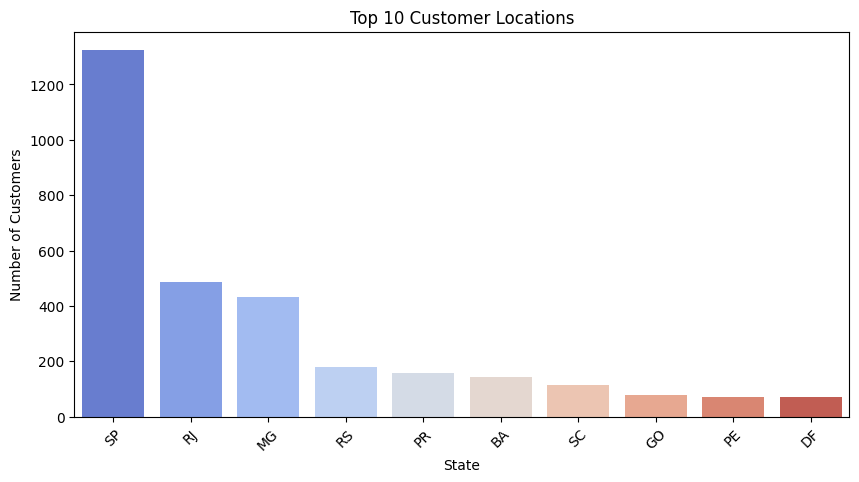

In [22]:
plt.figure(figsize=(10, 5))
top_states = data["customer_state"].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values, palette="coolwarm")
plt.title("Top 10 Customer Locations")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


Most Purchased Product Categories

C:\Users\Hp\AppData\Local\Temp\ipykernel_484\512921193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")


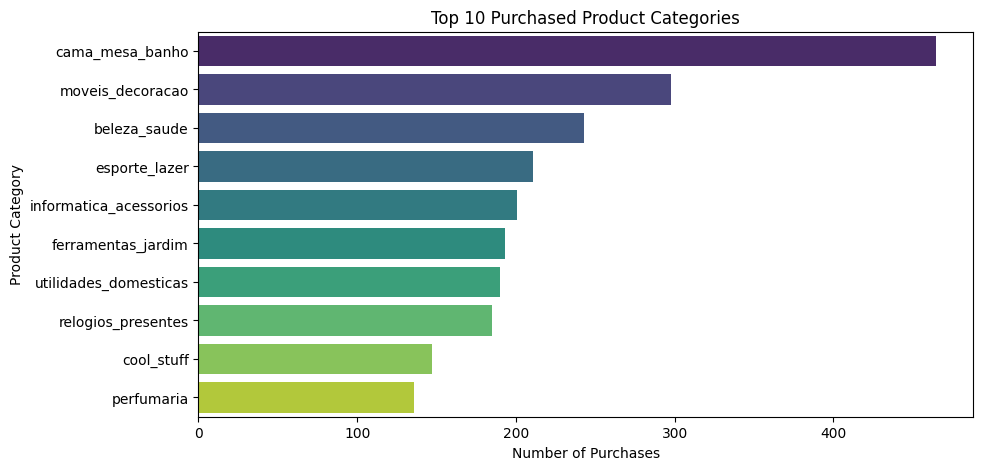

In [23]:
plt.figure(figsize=(10, 5))
top_categories = data["product_category_name"].value_counts().head(10)
sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")
plt.title("Top 10 Purchased Product Categories")
plt.xlabel("Number of Purchases")
plt.ylabel("Product Category")
plt.show()


Review Scores & Order Value

C:\Users\Hp\AppData\Local\Temp\ipykernel_484\3918258648.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["review_score"], y=data["order_products_value"], palette="coolwarm")


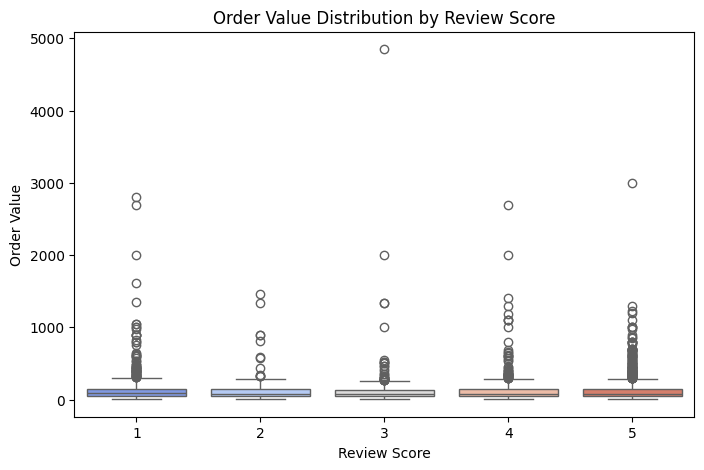

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["review_score"], y=data["order_products_value"], palette="coolwarm")
plt.title("Order Value Distribution by Review Score")
plt.xlabel("Review Score")
plt.ylabel("Order Value")
plt.show()


Delivery Performance (On-Time vs. Delayed Orders)

C:\Users\Hp\AppData\Local\Temp\ipykernel_484\2133219217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["delayed_delivery"], palette="Set2")


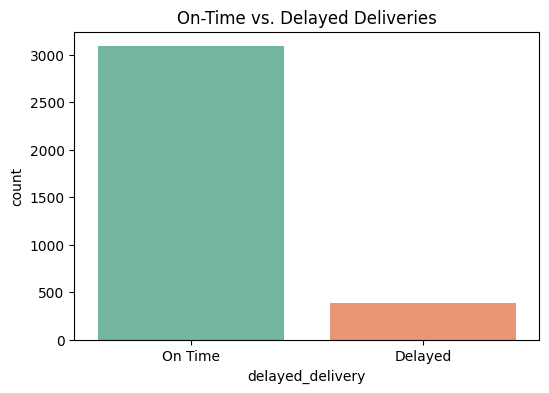

In [25]:
data["delayed_delivery"] = data["order_delivered_customer_date"] > data["order_estimated_delivery_date"]

plt.figure(figsize=(6, 4))
sns.countplot(x=data["delayed_delivery"], palette="Set2")
plt.xticks(ticks=[0, 1], labels=["On Time", "Delayed"])
plt.title("On-Time vs. Delayed Deliveries")
plt.show()


 Sentiment Analysis on Reviews (Optional)

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

negative_reviews = data[data["review_score"] < 3]["review_comment_message"].dropna()
words = " ".join(negative_reviews).lower().split()
filtered_words = [word for word in words if word not in stop_words]

word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Most Common Words in Negative Reviews")
plt.show()
